Module 11.5 – Practice Problems on Decision Trees

This notebook contains a small set of practice exercises based on Module 11:

Structure and intuition of decision trees
Entropy / Gini and splits
Pruning and overfitting
Evaluation metrics (accuracy, precision, recall, F1)
ROC curve, AUC, and threshold interpretation

Work through the questions in order. You can run the starter code, then fill in the TODO parts.

Problem 1 – Interpreting a Simple Decision Tree (Conceptual)
Consider the following tiny dataset:

Weather	Windy	Play
Sunny	No	Yes
Sunny	Yes	Yes
Rainy	No	No
Rainy	Yes	No
If we encode Sunny = 1, Rainy = 0, Windy: No = 0, Yes = 1, and train a decision tree on Weather and Windy, which single split do you expect the tree to choose first? Explain in 2–3 sentences.
In your own words, explain what Gini = 0 means for a node of a decision tree.
Give a real-life example (outside cricket) where a single yes/no question is enough to make a perfect decision.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree # DecisionTreeClassifier is used to create a decision tree model for classification tasks. plot_tree is used to visualize the decision tree.
from sklearn.model_selection import train_test_split # train_test_split is used to split the dataset into training and testing sets.
from sklearn.metrics import (
    confusion_matrix, # Computes the confusion matrix to evaluate the accuracy of a classification.
    accuracy_score, # Computes the accuracy of the model.
    precision_score, # Computes the precision of the model.
    recall_score, # Computes the recall of the model.means the ability of the model to find all the relevant cases within a dataset.
    f1_score, # Computes the F1 score of the model. Means the harmonic mean of precision and recall.
    roc_curve, # Computes the Receiver Operating Characteristic (ROC) curve.
    auc, # Computes the Area Under the Curve (AUC) for the ROC curve.
)

# Make plots a bit larger by default
plt.rcParams['figure.figsize'] = (7, 5) # .rcParams is a dictionary-like variable that contains default settings for matplotlib which is used to customize the appearance of plots.



In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Create the synthetic dataset
data = {
    'Weather': ['Sunny','Rainy','Sunny','Sunny','Rainy','Rainy','Sunny','Rainy'],
    'Windy':   [0,1,0,1,0,1,0,1],
    'Play':    [1,0,1,1,0,0,1,0]
}

df = pd.DataFrame(data)
df

,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


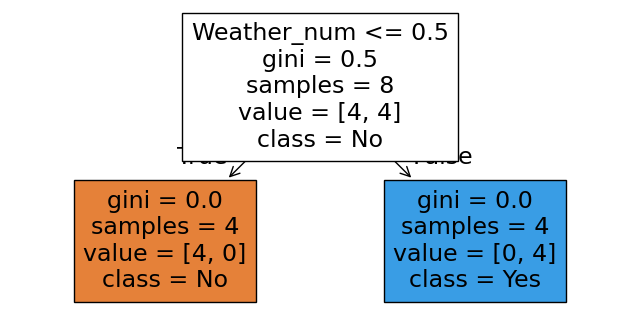

In [ ]:
# 2. Encode Weather as a numeric feature
df['Weather_num'] = df['Weather'].map({'Sunny': 1, 'Rainy': 0})

X = df[['Weather_num', 'Windy']]
y = df['Play']

# TODO: create and fit a DecisionTreeClassifier with max_depth=2

model = DecisionTreeClassifier(max_depth=2)
model.fit(X, y) # Fit the decision tree model to the data (X, y) means training the model using the features X and target variable y.

# 3. Visualize the tree
plt.figure(figsize=(8,4))
plot_tree(model, feature_names=X.columns, class_names=['No','Yes'], filled=True)
plt.show()

Your task:

Run the cells above.
In 2–4 sentences below, describe how the tree is making the decision. Mention what the root split is and what each leaf predicts.

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

np.random.seed(42)
n_samples = 300

age = np.random.randint(30, 80, size=n_samples)
chol = np.random.randint(150, 300, size=n_samples)
thalach = np.random.randint(90, 200, size=n_samples)

# Simple synthetic risk score
risk_score = 0.03 * (age - 40) + 0.02 * (chol - 200) - 0.02 * (thalach - 140)
prob = 1 / (1 + np.exp(-0.05 * risk_score))
target = (prob > np.median(prob)).astype(int)

df_heart = pd.DataFrame({
    'age': age,
    'chol': chol,
    'thalach': thalach,
    'target': target
})

df_heart.head()

,age,chol,thalach,target
0,68,253,128,1
1,58,233,90,1
2,44,261,92,1
3,72,248,166,1
4,37,242,181,0


Accuracy : 0.8833333333333333
Precision: 0.8571428571428571
Recall   : 0.8888888888888888
F1-score : 0.8727272727272727


<Axes: >

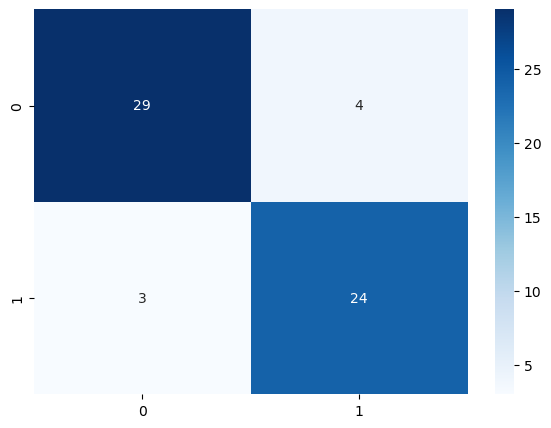

In [16]:
# 1. Train-test split
X = df_heart[['age','chol','thalach']]
y = df_heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#here, X_train is the training features used to train the model, y_train is the corresponding labels for those features. X_test is the features used to test the model, and y_test is the true labels for those test features.
# # feature means the input variables used to make predictions, and label means the output variable that we are trying to predict. 

# TODO: create a DecisionTreeClassifier with max_depth=4 and fit it and predict
tree_clf = DecisionTreeClassifier(max_depth=4) # Create a DecisionTreeClassifier with a maximum depth of 4, significance: This limits how deep the tree can grow, helping to prevent overfitting.
tree_clf.fit(X_train, y_train) # Fit the model to the training data (X_train, y_train).
y_pred = tree_clf.predict(X_test) 

# 2. Compute metrics
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall   :', recall_score(y_test, y_pred))
print('F1-score :', f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

Problem 4 – ROC Curve, AUC, and Thresholds
In this final exercise you will:

Use the trained heart-disease tree from Problem 3 
Plot the ROC curve and compute AUC
Try different decision thresholds and see how the confusion matrix changes

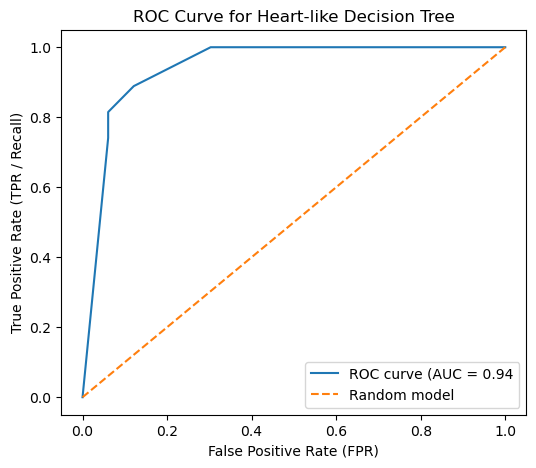

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Get predicted probabilities for class 1
y_proba = tree_clf.predict_proba(X_test)[:, 1]

# TODO: 2. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
# 3. Plot ROC curve



plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--', label='Random model')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR / Recall)')
plt.title('ROC Curve for Heart-like Decision Tree')
plt.legend()
plt.show()

In [18]:
# 3. Play with different thresholds
import numpy as np

for thr in [0.3, 0.5, 0.7]:
    y_custom = (y_proba >= thr).astype(int)
    cm_thr = confusion_matrix(y_test, y_custom)
    print(f'\nThreshold = {thr}')
    print(cm_thr)
    print('Recall   :', recall_score(y_test, y_custom))
    print('Precision:', precision_score(y_test, y_custom))


Threshold = 0.3
[[29  4]
 [ 3 24]]
Recall   : 0.8888888888888888
Precision: 0.8571428571428571

Threshold = 0.5
[[29  4]
 [ 3 24]]
Recall   : 0.8888888888888888
Precision: 0.8571428571428571

Threshold = 0.7
[[29  4]
 [ 3 24]]
Recall   : 0.8888888888888888
Precision: 0.8571428571428571
